In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

In [4]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query('SELECT * FROM player_attributes',cnx)

In [16]:
#df.head
#df.columns
df.describe().transpose()

count           mean            std     min        25%  \
id                  183978.0   91989.500000   53110.018250     1.0   45995.25   
player_fifa_api_id  183978.0  165671.524291   53851.094769     2.0  155798.00   
player_api_id       183978.0  135900.617324  136927.840510  2625.0   34763.00   
overall_rating      183142.0      68.600015       7.041139    33.0      64.00   
potential           183142.0      73.460353       6.592271    39.0      69.00   
crossing            183142.0      55.086883      17.242135     1.0      45.00   
finishing           183142.0      49.921078      19.038705     1.0      34.00   
heading_accuracy    183142.0      57.266023      16.488905     1.0      49.00   
short_passing       183142.0      62.429672      14.194068     3.0      57.00   
volleys             181265.0      49.468436      18.256618     1.0      35.00   
dribbling           183142.0      59.175154      17.744688     1.0      52.00   
curve               181265.0      52.965675      18.255788     2.0      41.00   
free_kick_accuracy  183142.0      49.380950      17.831746     1.0      36.00   
long_passing        183142.0      57.069880      14.394464     3.0      49.00   
ball_control        183142.0      63.388879      15.196671     5.0      58.00   
acceleration        183142.0      67.659357      12.983326    10.0      61.00   
sprint_speed        183142.0      68.051244      12.569721    12.0      62.00   
agility             181265.0      65.970910      12.954585    11.0      58.00   
reactions           183142.0      66.103706       9.155408    17.0      61.00   
balance             181265.0      65.189496      13.063188    12.0      58.00   
shot_power          183142.0      61.808427      16.135143     2.0      54.00   
jumping             181265.0      66.969045      11.006734    14.0      60.00   
stamina             183142.0      67.038544      13.165262    10.0      61.00   
strength            183142.0      67.424529      12.072280    10.0      60.00   
long_shots          183142.0      53.339431      18.367025     1.0      41.00   
aggression          183142.0      60.948046      16.089521     6.0      51.00   
interceptions       183142.0      52.009271      19.450133     1.0      34.00   
positioning         183142.0      55.786504      18.448292     2.0      45.00   
vision              181265.0      57.873550      15.144086     1.0      49.00   
penalties           183142.0      55.003986      15.546519     2.0      45.00   
marking             183142.0      46.772242      21.227667     1.0      25.00   
standing_tackle     183142.0      50.351257      21.483706     1.0      29.00   
sliding_tackle      181265.0      48.001462      21.598778     2.0      25.00   
gk_diving           183142.0      14.704393      16.865467     1.0       7.00   
gk_handling         183142.0      16.063612      15.867382     1.0       8.00   
gk_kicking          183142.0      20.998362      21.452980     1.0       8.00   
gk_positioning      183142.0      16.132154      16.099175     1.0       8.00   
gk_reflexes         183142.0      16.441439      17.198155     1.0       8.00   

                         50%        75%       max  
id                   91989.5  137983.75  183978.0  
player_fifa_api_id  183488.0  199848.00  234141.0  
player_api_id        77741.0  191080.00  750584.0  
overall_rating          69.0      73.00      94.0  
potential               74.0      78.00      97.0  
crossing                59.0      68.00      95.0  
finishing               53.0      65.00      97.0  
heading_accuracy        60.0      68.00      98.0  
short_passing           65.0      72.00      97.0  
volleys                 52.0      64.00      93.0  
dribbling               64.0      72.00      97.0  
curve                   56.0      67.00      94.0  
free_kick_accuracy      50.0      63.00      97.0  
long_passing            59.0      67.00      97.0  
ball_control            67.0      73.00      97.0  
acceleration            69.0   

In [37]:
df.isnull().any().any(),df.shape

(True, (183978, 42))

In [5]:
df.isnull().sum(axis =0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [6]:
rows = df.shape[0]
df = df.dropna()
#print(df)

In [7]:
df.isnull().any().any(), df.shape

(False, (180354, 42))

In [8]:
rows - df.shape[0]

3624

In [9]:
df = df.reindex(np.random.permutation(df.index))

In [10]:
#df.head(100)

In [11]:
#df[:100][['penalties','overall_rating']]

In [24]:
potentialFeatures = ['potential','reactions','ball_control','ball_control','long_passing']

In [25]:
for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print(f,related)
    

potential 0.7654346716757727
reactions 0.7718560966627328
ball_control 0.4439907628262989
ball_control 0.4439907628262989
long_passing 0.4345249915571975


In [36]:
df.columns
#df['attacking_work_rate'].head

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [33]:
col = ['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [34]:
corr =[ df['overall_rating'].corr(df[f]) for f in col]

In [35]:
len(col),len(corr)

(34, 34)

In [49]:
def plot_dataframe(df, y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [50]:
df2 = pd.DataFrame({'attributes': col, 'correlation': corr}) 

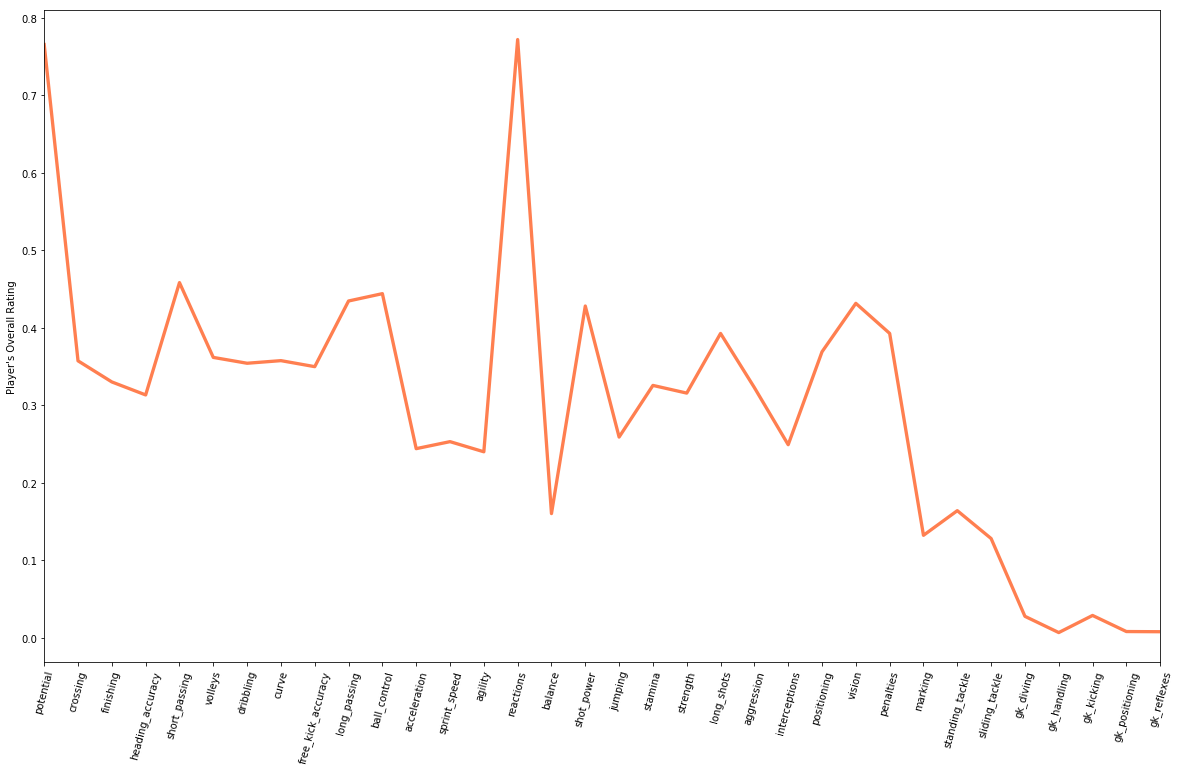

In [51]:
plot_dataframe(df2, 'Player\'s Overall Rating')